In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
sys.path.append(pathap)
from GENE_ML.gene_ml.samplers.uniform import Uniform
from GENE_ML.gene_ml.datagen.datagen import DataGen

# check config.py
from config import Config
config = Config()

# Folder name for the data to be saved in within the self.remote_save_base_dir of config
remote_save_name = "data_gen_local_test_anna"

# This is used to identify the problem folder in gene
ex_id = 'dglt_anna'


/LUMI_TYKKY_A4hLOAk/miniconda/envs/env1/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/LUMI_TYKKY_A4hLOAk/miniconda/envs/env1/lib/python3.12/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
/LUMI_TYKKY_A4hLOAk/miniconda/envs/env1/lib/python3.12/site-packages/paramiko/transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [ ]:

parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
bounds = [(4,6.7), (2.1,3.5), (0.16,2.9)] #if bounds is a float rather than tuple then the sampler will make that the only value

num_samples = 20

sampler_uniform = Uniform(parameters=parameters, num_samples=num_samples ,bounds=bounds)


single_run_timelim = 900
single_run_simtimelim = 300

datagen = DataGen(config, sampler_uniform, 
                  ex_id=ex_id, remote_save_name=remote_save_name, 
                  single_run_timelim=single_run_timelim, 
                  single_run_simtimelim=single_run_simtimelim, num_workers=2)



In [9]:
datagen.executor.pre_run_check()


EXECUTOR, PRINT_CHECK_PARAMETERS
 ----------------------------------------------------------------------------------------------------
PRE RUN CHECK


SINGLE RUN TIMELIM 900 N SAMPLES 10
THE ESTIMATED WALLTIME FOR RUN ex-dglt_anna_batch-0 is 00-02:45:00, dd-hh-mm-ss TO RUN 10 SAMPLES
CHECKING IF PROBLEM DIRECTORY EXISTS
PROBLEM DIRECTORY EXISTS
SBATCH
WRITE SBATCH
PARSING SAMPLES TO INPUT FILE at: /project/project_462000451/gene/auto_prob_ex-dglt_anna_batch-0/parameters
Writing to /project/project_462000451/gene/auto_prob_ex-dglt_anna_batch-0/parameters
ALTERING THE PARAMETERS FILE IN THE REMOTE PROBLEM DIRECTORY
50 timelim 900
    timelim = 7200

    timelim = 900



CODE RUN: SETTING SIMULATION TIME LIMMIT


51 simtimelim 300
    simtimelim = 7200

    simtimelim = 300

PARAMETERS IN RUN DIR:
0: &parallelization

1:     n_parallel_sims = 1

2:     n_procs_sim = 128

3:     n_procs_s = -1

4:     n_procs_z = -1

5:     n_procs_w = -1

6:     min_npw = -1

7:     max_npw = -1

8:     

In [10]:
datagen.executor.start_runs()

EXECUTING BATCHES
PRE RUN CHECK


SINGLE RUN TIMELIM 900 N SAMPLES 10
THE ESTIMATED WALLTIME FOR RUN ex-dglt_anna_batch-0 is 00-02:45:00, dd-hh-mm-ss TO RUN 10 SAMPLES
CHECKING IF PROBLEM DIRECTORY EXISTS
PROBLEM DIRECTORY EXISTS
SBATCH
WRITE SBATCH
PARSING SAMPLES TO INPUT FILE at: /project/project_462000451/gene/auto_prob_ex-dglt_anna_batch-0/parameters
Writing to /project/project_462000451/gene/auto_prob_ex-dglt_anna_batch-0/parameters
ALTERING THE PARAMETERS FILE IN THE REMOTE PROBLEM DIRECTORY
50 timelim 900
    timelim = 7200

    timelim = 900



CODE RUN: SETTING SIMULATION TIME LIMMIT


51 simtimelim 300
    simtimelim = 7200

    simtimelim = 300

PARAMETERS IN RUN DIR:
0: &parallelization

1:     n_parallel_sims = 1

2:     n_procs_sim = 128

3:     n_procs_s = -1

4:     n_procs_z = -1

5:     n_procs_w = -1

6:     min_npw = -1

7:     max_npw = -1

8:     n_procs_v = -1

9:     n_procs_x = -1

10:     n_procs_y = -1

11: /

12: 

13: &box

14:     n_spec = 2

15:     nx0 

In [11]:
finished = datagen.executor.check_finished()
print(finished)


CHECKING IF JOBS FINISHED: ['9100900', '9100901', '9100902', '9100903']
FINISHED [False False False False]
RUNNING SBATCH IDs:  ['9100900' '9100901' '9100902' '9100903']


EXECUTOR, CHECK FINISHED False
False


In [6]:
#Not adapted for local yet
#datagen.executor.check_complete()

In [7]:
print(datagen.remote_save_dir)

/scratch/project_462000451/gene_out/gene_auto_97781/data_gen_local_test_anna


# Loading Data Set:

In [2]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from config import Config
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser

config = Config()
parser = GENE_scan_parser(config)
#save_dir=datagen.remote_save_dir
save_dir = "/scratch/project_462000451/gene_out/out_anna/run_name/"
remote_save_name = "tt"
data_set = ScanData2(name=remote_save_name, config=config, parser=parser, save_dir=save_dir,  split_ratio=[0,0,1], categorise=True)


/LUMI_TYKKY_A4hLOAk/miniconda/envs/env1/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/LUMI_TYKKY_A4hLOAk/miniconda/envs/env1/lib/python3.12/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
/LUMI_TYKKY_A4hLOAk/miniconda/envs/env1/lib/python3.12/site-packages/paramiko/transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


Initialising dataset
HIT SIM LIMIT TEST ON FILE: /scratch/project_462000451/gene_out/out_anna/run_name/batch_name/scanfiles0078/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstlt, len stat and run_count 8 8
line   0: *** entering time loop ***

hstlt, len stat and run_count 9 9
line   0: *** entering time loop ***

hstlt, len stat and run_count 10 10
line   0: *** entering time loop ***

hstlt, len stat and run_coun

In [3]:
data_set.df

,kymin1,growthrate,frequency,scanfiles_path,suffix,run_time,termination_reason,fingerprint,fingerprint_string,ratio_iheat_eheat,...,particle_electromagnetic_Electrons,heat_electrostatic_Electrons,heat_electromagnetic_Electrons,particle_electrostatic_Ions,particle_electromagnetic_Ions,heat_electrostatic_Ions,heat_electromagnetic_Ions,categorisation,avg_kperp_squared,mixing_length
0,0.047579,6.7310,0.0250,/scratch/project_462000451/gene_out/out_anna/r...,0001,9.527,growthrate_converged,[ITG/TEM],ITG/TEM,0.885403,...,9.699500e+32,3.763500e+36,2.816300e+35,8.437000e+35,9.699500e+32,3.621700e+36,3.449900e+33,Nothing,2.496372e+01,2.696312e-01
1,0.063439,6.6610,0.3630,/scratch/project_462000451/gene_out/out_anna/r...,0002,8.210,growthrate_converged,[ITG/TEM],ITG/TEM,0.891593,...,6.559700e+32,2.719300e+36,1.956200e+35,6.118600e+35,6.559700e+32,2.626500e+36,2.317800e+33,Nothing,4.437996e+01,1.500903e-01
2,0.095158,6.4590,-0.2100,/scratch/project_462000451/gene_out/out_anna/r...,0003,7.800,growthrate_converged,[ITG/TEM],ITG/TEM,0.906615,...,3.835100e+27,1.932400e+31,1.264200e+30,4.388400e+30,3.835100e+27,1.883700e+31,1.323700e+28,Nothing,9.985490e+01,6.468386e-02
3,0.206175,4.9740,0.4880,/scratch/project_462000451/gene_out/out_anna/r...,0004,7.576,growthrate_converged,[ITG/TEM],ITG/TEM,0.963492,...,-2.960300e+23,7.245100e+28,3.427800e+27,1.711800e+28,-2.960300e+23,7.339900e+28,-9.011600e+24,Nothing,4.687633e+02,1.061090e-02
4,0.301333,0.7430,-0.6130,/scratch/project_462000451/gene_out/out_anna/r...,0005,38.931,growthrate_converged,[ITG/TEM],ITG/TEM,1.032697,...,-9.268000e+12,1.860300e+16,1.874200e+15,4.970500e+15,-9.268000e+12,2.111300e+16,-3.929800e+13,Nothing,1.001323e+03,7.420185e-04
5,0.396491,0.6900,-0.4330,/scratch/project_462000451/gene_out/out_anna/r...,0006,51.366,growthrate_converged,[ITG/TEM],ITG/TEM,1.032691,...,-4.105800e+11,2.388600e+15,2.069200e+14,6.226000e+14,-4.105800e+11,2.672800e+15,-1.587800e+12,Nothing,1.733592e+03,3.980175e-04
6,0.507509,0.4910,0.5790,/scratch/project_462000451/gene_out/out_anna/r...,0007,91.542,growthrate_converged,[ITG/TEM],ITG/TEM,1.066646,...,-2.159700e+12,1.611700e+16,2.313900e+15,4.527000e+15,-2.159700e+12,1.953000e+16,-6.525100e+12,Nothing,2.840317e+03,1.728680e-04
7,0.602666,0.4930,1.0280,/scratch/project_462000451/gene_out/out_anna/r...,0008,46.022,growthrate_converged,[None],None,1.106935,...,-1.272000e+03,8.331900e+06,1.206900e+06,2.429300e+06,-1.272000e+03,1.044600e+07,-4.065000e+03,Nothing,4.005291e+03,1.230872e-04
8,0.697824,0.3800,0.9340,/scratch/project_462000451/gene_out/out_anna/r...,0009,177.423,growthrate_converged,[None],None,1.102261,...,-1.062900e+16,4.651800e+18,-1.131400e+17,1.135400e+18,-1.062900e+16,4.965600e+18,-1.459800e+16,Nothing,5.369975e+03,7.076383e-05
9,0.792982,0.5410,0.8480,/scratch/project_462000451/gene_out/out_anna/r...,0010,63.756,growthrate_converged,[None],None,1.138551,...,-3.795200e+05,4.168300e+08,-1.759100e+07,1.017800e+08,-3.795200e+05,4.484900e+08,-2.614200e+05,Nothing,6.934368e+03,7.801720e-05


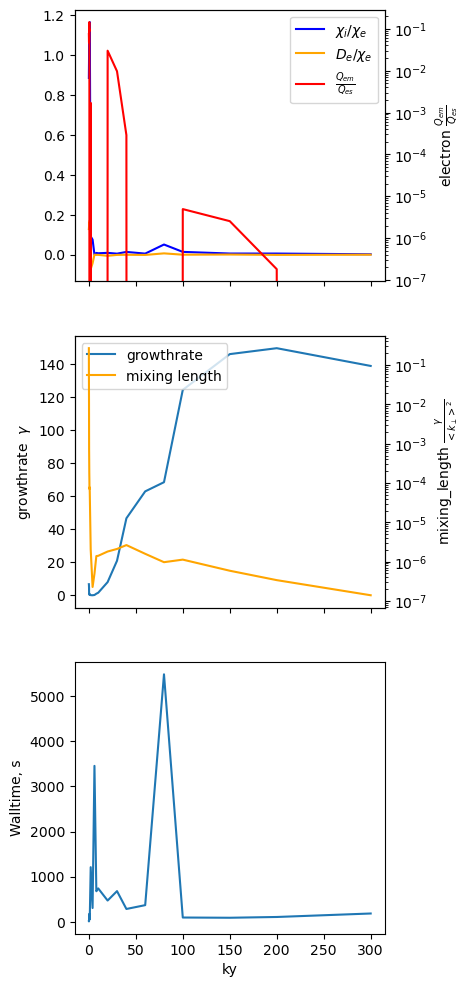

In [4]:
# for k_y scans
data_set.plot_summary()

# Combine datasets

In [28]:
data_set_1 = ScanData('data_gen_tutorial7', config=config, parser=parser, host=None, remote_save_dir=None,  test_percentage=50)
data_set_2 = ScanData('data_gen_tutorial7', config=config, parser=parser, host=None, remote_save_dir=None,  test_percentage=50)

data_set_3 = data_set_1.concat([data_set_2])

data_set_3.df

Initialising dataset
SSH PATH None:None
SCAN LOG PATH /home/djdaniel/DEEPlasma/scanlogs/data_gen_tutorial7

LOADING FROM SCANLOG DIR: /home/djdaniel/DEEPlasma/scanlogs/data_gen_tutorial7
LOG PATHS ['geneerr_batch-0_scanfiles-0.log' 'geneerr_batch-1_scanfiles-0.log'
 'scan_batch-0_scanfiles-0.log' 'scan_batch-1_scanfiles-0.log']

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/DEEPlasma/scanlogs/data_gen_tutorial7/scan_batch-0_scanfiles-0.log : /home/djdaniel/DEEPlasma/scanlogs/data_gen_tutorial7/geneerr_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/DEEPlasma/scanlogs/data_gen_tutorial7/scan_batch-1_scanfiles-0.log : /home/djdaniel/DEEPlasma/scanlogs/data_gen_tutorial7/geneerr_batch-1_scanfiles-0.log

10 SAMPLES RAN OUT OF 10 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 10
NaN PERCENTAGE =  0.0
SETTING VARIABLES

RANDOMLY SPLITTING DATA INTO TEST AND TRAINING SETS: 50% test, 50 training.
Initialising dataset
SSH PATH

/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:213: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df_inc_nan = pd.concat(dfs_inc_nans)
/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:216: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs), np.sum(n_samp_all), np.sum(n_requested_all), np.sum(n_samp_nonan_all)
/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:213: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA

,run_time,omt2,omt1,omn1,growthrate,frequency
0,24.582,3.491141,4.499231,1.868744,0.1180,0.4570
1,21.433,3.090270,4.539037,2.521974,0.0860,0.3430
2,26.437,2.134392,6.083308,2.495368,0.1370,0.4200
3,26.268,3.343549,5.836209,1.698337,0.1710,0.5400
4,24.516,3.224416,5.275577,1.956014,0.1310,0.4630
5,32.763,3.125924,6.471158,0.955979,0.2050,0.7180
6,42.197,2.106810,5.960762,0.942079,0.1510,0.6350
7,24.592,2.754898,4.186166,0.795331,0.1500,0.6580
8,19.723,2.780213,5.508589,2.524604,0.1300,0.3810
9,24.556,2.390622,6.352449,2.364465,0.1620,0.4600
